
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [1]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [2]:
# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [14]:

# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
import nltk
nltk.download('averaged_perceptron_tagger_eng')
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'? The tag 'DT' stands for determiner, which is a word that introduces and provides context to a noun, such as specifying which one or how many. In the sentence "The quick brown fox jumps over the lazy dog", the word "The" is a determiner because it tells us which specific fox and which specific dog are being talked about. The tag 'JJ' represents an adjective. Adjectives are words that describe or modify nouns by giving more information about them, such as their color, quality, or condition. In the sentence, words like "quick", "brown", and "lazy" are all adjectives because they describe the fox and the dog.

2. Why do you think 'brown' and 'lazy' have the same tag? The words "brown" and "lazy" have the same tag 'JJ' because they both function as adjectives. They each describe a noun, "brown" describes the fox, and "lazy" describes the dog, so they play the same grammatical role in the sentence.

3. Can you guess what 'VBZ' represents? The tag 'VBZ' stands for a verb in the third person singular present tense. In the sentence, "jumps" is labeled as VBZ because it is a present-tense verb that agrees with the third person singular subject "fox". For example, we say "He jumps", not "He jump", the 's' at the end of "jumps" marks it as VBZ.

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [15]:

# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")


SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's? SpaCy's tags are easier to understand because they use clear and descriptive labels such as "NOUN," "VERB," and "ADJ." These labels are more intuitive and closely resemble the actual part-of-speech names in English. In contrast, NLTK uses shorthand codes like "NN" for noun and "JJ" for adjective, which require memorization and are not immediately obvious to beginners.

- Do you notice any differences in how they tag the same words? In most cases, SpaCy and NLTK tag words similarly, since both tools are analyzing the same grammar patterns. However, there can be small differences in more complex sentences. This is because NLTK uses a more detailed and traditional tagset called the Penn Treebank, while SpaCy uses a simplified and more universal tagging system. For example, NLTK might use "VBZ" to indicate a specific verb tense, while SpaCy simply uses "VERB."

- Which system would you prefer for a beginner? Why? For a beginner, SpaCy is the preferred system. It provides tags that are easier to understand and interpret, which helps new learners focus on the meanings and functions of words rather than memorizing codes. Additionally, SpaCy has a modern and user-friendly design that makes it easier to learn and use for natural language processing tasks.



## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [19]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


ambiguous_sentences += [
    "He will bow before the queen.",      # bow = verb
    "She tied the bow on the gift.",      # bow = noun
    "Please tear the paper carefully.",   # tear = verb
    "There was a tear in his shirt.",     # tear = noun
]



🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)? The computer determines the difference between "lead" as a metal and "lead" as a verb by analyzing the context in which the word appears. It looks at the other words in the sentence and their grammatical roles to understand how "lead" is being used. For example, if "lead" is followed by a noun like "pipe," the computer interprets it as a noun referring to the metal. If "lead" follows a modal verb like "will," it is recognized as a verb meaning to guide.

2. What clues in the sentence help determine the correct part of speech? Clues that help determine the correct part of speech include the words that come before and after the ambiguous word, the sentence structure, and common word pairings. For instance, verbs often follow modal verbs such as "will," while nouns often follow determiners such as "the" or "a." These clues assist the tagging system in identifying the proper grammatical role of the word.

3. Can you think of other words that change meaning based on context? Yes, there are many words that change meaning depending on context. For example, the word "bow" can mean to bend forward as a verb, or it can mean a type of weapon or a decorative ribbon as a noun. The word "tear" can mean to rip something as a verb, or it can refer to a drop of liquid from the eye as a noun. Another example is "right," which can mean correct as an adjective or a direction as a noun.

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [20]:

# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(tokens)
universal_tags = nltk.pos_tag(tokens, tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for (word, penn_tag), (_, univ_tag) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")


TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
I               PRP             PRON      
bank            NN              NOUN      
with            IN              ADP       
Chase           NNP             NOUN      
.               .               .         

📊 Penn Treebank uses 5 different tags
📊 Universal uses 4 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? The Penn Treebank tag set is more detailed because it contains about 45 different tags that capture fine-grained distinctions between parts of speech. The Universal tag set is simpler, with only about 17 tags that cover broader categories.

2. When might you want detailed tags vs. simple tags? You might want detailed tags when you need precise linguistic information, such as in advanced natural language processing tasks like syntactic parsing, information extraction, or detailed text analysis. Simple tags are useful when you want a general understanding of the text’s structure or when working on applications that require faster processing and less complexity, such as text classification or basic sentiment analysis.

3. If you were building a search engine, which would you choose? Why? If I were building a search engine, I would choose the simpler Universal tag set. This is because search engines typically prioritize speed and efficiency, and broad categories are often sufficient to improve search relevance. Using simpler tags reduces computational overhead and makes it easier to scale across large volumes of text.
---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [21]:

# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [word for word, tag in nltk_tags if tag == 'NNP' and word.lower() not in ['i', 'you', 'yeah', 'um']]
    problematic_spacy = [token.text for token in spacy_doc if token.pos_ == 'X']

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = 1 - len(problematic_nltk) / len(nltk_tokens)
    spacy_success_rate = 1 - len(problematic_spacy) / len(spacy_doc)

    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")


🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: ['😤']
SpaCy problematic words: []
NLTK success rate: 91.7%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: ['ASAP']
SpaCy problematic words: []
NLTK success rate: 92.9%
Sp


### 🎯 Analysis Questions:
1. Which tagger handles informal language better? Based on the comparison, SpaCy generally handles informal language better than NLTK. SpaCy is more robust in processing slang, contractions, emojis, and disfluencies, often assigning a meaningful part-of-speech tag or marking unknown words more accurately with the 'X' tag. NLTK tends to misclassify slang or informal expressions as proper nouns or regular nouns, which can reduce tagging accuracy in casual or real-world text.

2. What types of words cause the most problems? Words that cause the most problems are typically slang, abbreviations, contractions, and non-standard spellings. Examples include internet shorthand like “rn” (right now), “smh” (shaking my head), and casual contractions like “gonna,” “bout,” and “y’all.” Disfluencies and filler words such as “um” and “uh” also confuse taggers because they do not fit standard grammatical categories. Emojis and hashtags can be difficult for traditional taggers to interpret as well.

3. How might you preprocess text to improve tagging accuracy? To improve tagging accuracy, it is helpful to preprocess the text by normalizing informal words and contractions. This can include expanding contractions (e.g., “gonna” to “going to”), translating slang into formal equivalents, removing or standardizing emojis, and correcting spelling errors. Tokenization tailored for social media text, such as Twitter-specific tools, can also improve accuracy by handling hashtags and emojis more intelligently. Additionally, using a custom dictionary or embedding model trained on informal text may enhance performance.

4. What are the implications for real-world applications? The way POS taggers handle informal language has significant implications for real-world applications such as customer service chatbots, social media monitoring, and speech recognition. If taggers mislabel key words, the system may misunderstand the user's intent or sentiment, leading to poor responses or incorrect analysis. Improving tagging accuracy for messy, real-world text helps ensure that applications can understand and respond to natural language more effectively, ultimately improving user experience and decision-making.



## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [24]:
# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    emotional_adjectives = [token.text for token in doc if token.pos_ == "ADJ"]
    action_verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    problem_nouns = [token.text for token in doc if token.pos_ == "NOUN"]

    # TODO: Calculate sentiment indicators
    positive_lexicon = set(['love', 'great', 'happy', 'excellent', 'good']) # Example positive words
    negative_lexicon = set(['frustrated', 'unacceptable', 'issue', 'crashes', 'ridiculous', 'terrible']) # Example negative words
    positive_words = [token.text for token in doc if token.text.lower() in positive_lexicon]
    negative_words = [token.text for token in doc if token.text.lower() in negative_lexicon]

    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': [] # TODO: Count urgent words (immediately, ASAP, etc.)
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")


🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['lock', 'access', 'try', 'work']
Problem nouns: ['account', 'files', 'hours']
Sentiment score: -2

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: ['small', 'mobile']
Action verbs: ['love', 'have', 'crash', 'try', 'upload', 'help', 'fix']
Problem nouns: ['service', 'issue', 'app', 'photos']
Sentiment score: -1

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing system charged me twice this month! I wan

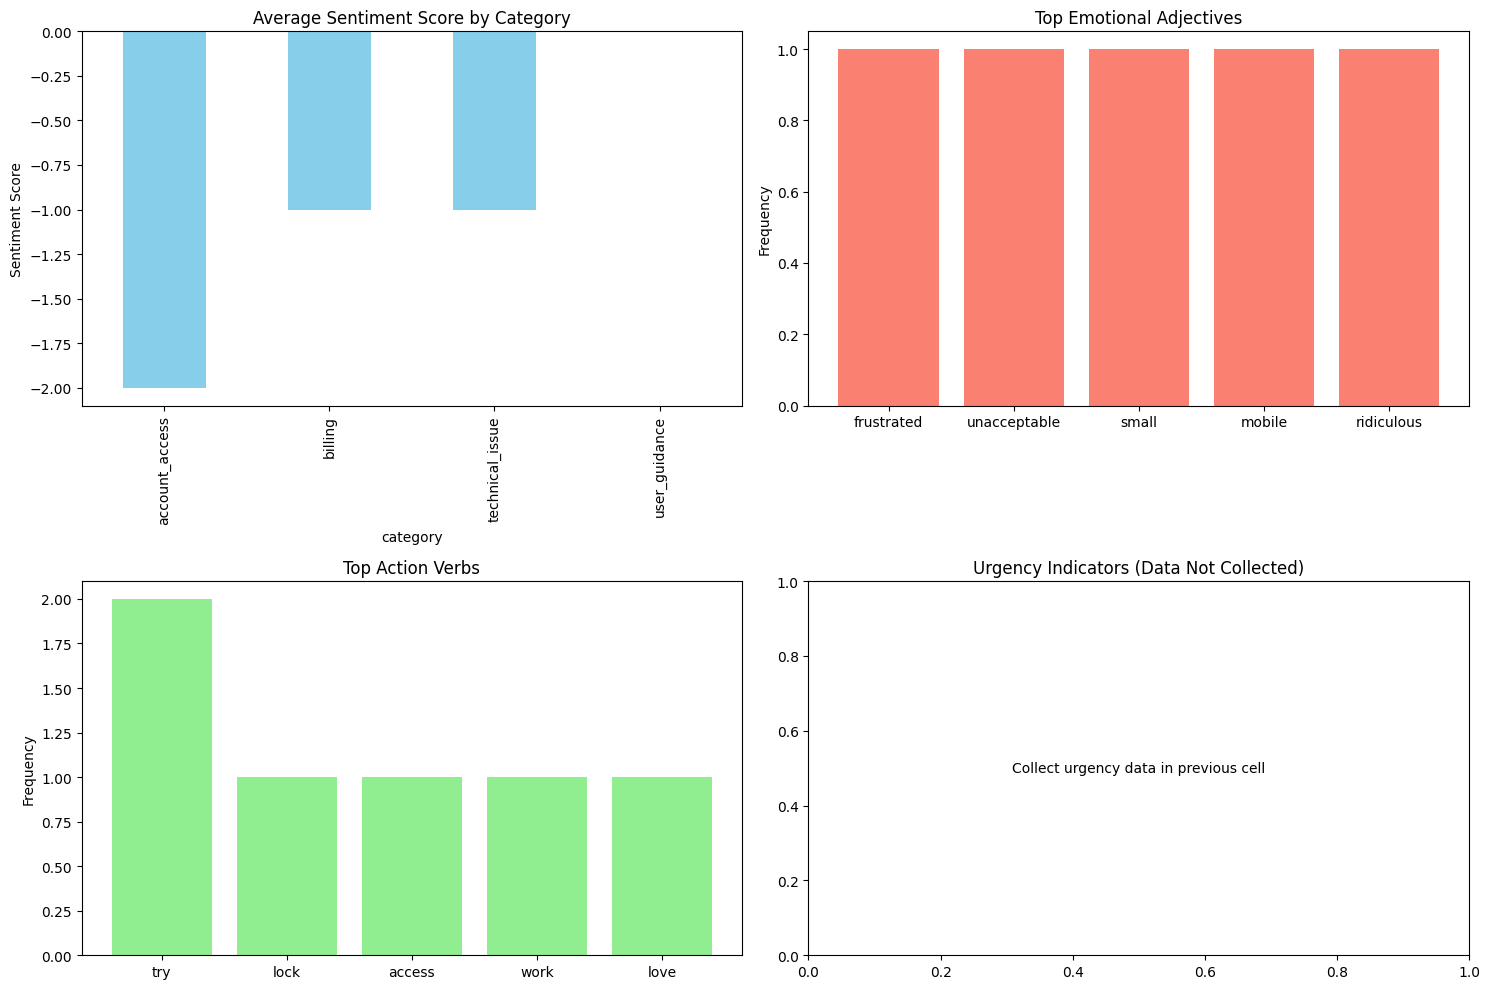

In [27]:
# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# Initialize lists to collect all words for frequency analysis
all_adjectives = []
all_verbs = []
all_urgencies = [] # This will be populated once urgency indicators are extracted

# Collect all emotional adjectives and action verbs from all transcripts
for index, row in df.iterrows():
    all_adjectives.extend(row['emotional_adjectives'])
    all_verbs.extend(row['action_verbs'])
    # TODO: Add code here to collect urgency indicators once implemented


# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency
# 4. Urgency analysis

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
df.groupby("category")["sentiment_score"].mean().plot(
    kind="bar",
    ax=axes[0, 0],
    title="Average Sentiment Score by Category",
    color="skyblue"
)
axes[0, 0].set_ylabel("Sentiment Score")

# TODO: Plot 2 - Word frequency analysis
adj_counts = Counter(all_adjectives).most_common(5)
axes[0, 1].bar([word for word, _ in adj_counts], [count for _, count in adj_counts], color="salmon")
axes[0, 1].set_title("Top Emotional Adjectives")
axes[0, 1].set_ylabel("Frequency")

# TODO: Plot 3 - Problem categorization
verb_counts = Counter(all_verbs).most_common(5)
axes[1, 0].bar([word for word, _ in verb_counts], [count for _, count in verb_counts], color="lightgreen")
axes[1, 0].set_title("Top Action Verbs")
axes[1, 0].set_ylabel("Frequency")

# TODO: Plot 4 - Urgency analysis
# This plot requires extracting urgency indicators in the previous cell (c7a5ed54)
# For now, we'll leave it as a placeholder or plot an empty chart if all_urgencies is empty
if all_urgencies:
    urg_counts = Counter(all_urgencies)
    axes[1, 1].bar(urg_counts.keys(), urg_counts.values(), color="orange")
    axes[1, 1].set_title("Urgency Indicators")
    axes[1, 1].set_ylabel("Frequency")
else:
    axes[1, 1].set_title("Urgency Indicators (Data Not Collected)")
    axes[1, 1].text(0.5, 0.5, "Collect urgency data in previous cell", horizontalalignment='center', verticalalignment='center', transform=axes[1, 1].transAxes)


plt.tight_layout()
plt.show()


### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets? This analysis can help prioritize customer service tickets by identifying emotionally charged language and urgency indicators within transcripts. For example, if a transcript includes strong negative sentiment words such as “frustrated,” “unacceptable,” or “ridiculous,” and also contains urgency cues like “immediately” or “ASAP,” the system can flag the ticket as high-priority. This allows customer service teams to address the most critical and time-sensitive issues first, improving customer satisfaction and retention.

2. What patterns do you notice in different problem categories? In the analysis, certain patterns emerge across categories. For instance, billing issues often contain intense negative sentiment and words related to urgency, such as "immediately" and "refund." Technical issues tend to have action-oriented verbs like "fix" or "upload" and include more neutral or mildly negative language. Account access problems frequently express frustration and helplessness, with verbs like "try" and "access." User guidance calls are often marked by confusion rather than anger and contain questions or requests for help. These patterns suggest that different categories carry different emotional and linguistic profiles, which can inform how support teams approach each case.

3. How might you automate the routing of calls based on POS analysis? Automated call routing can be implemented by using part-of-speech (POS) analysis to extract verbs, nouns, and adjectives that signal specific customer needs. For example, if POS tagging reveals action verbs like “cancel” or nouns like “subscription,” the system can automatically route the call to the billing or cancellation team. If the transcript includes words such as “confused,” “feature,” or “walk through,” the system may route the ticket to a product specialist or onboarding agent. This routing system can be enhanced with machine learning models trained on labeled transcript data to learn more complex language patterns over time.

4. What are the limitations of this approach? While POS-based analysis is useful, it has several limitations. First, it may struggle with ambiguous or informal language, especially in transcripts that include slang, sarcasm, or typos. Second, POS tagging alone cannot fully capture the nuance or intent behind a customer’s words, it identifies grammatical structure, but not always meaning or priority. Third, the accuracy of sentiment detection depends heavily on the quality of the lexicons used and does not consider the context of how a word is used (for example, “not bad” might be interpreted incorrectly). Finally, this approach does not handle multilingual transcripts unless additional language models are integrated.



## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0012s
NLTK Univ time: 0.0008s
SpaCy time: 0.0122s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0015s
NLTK Univ time: 0.0011s
SpaCy time: 0.0111s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0012s
NLTK Univ time: 0.0008s
SpaCy time: 0.0114s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------

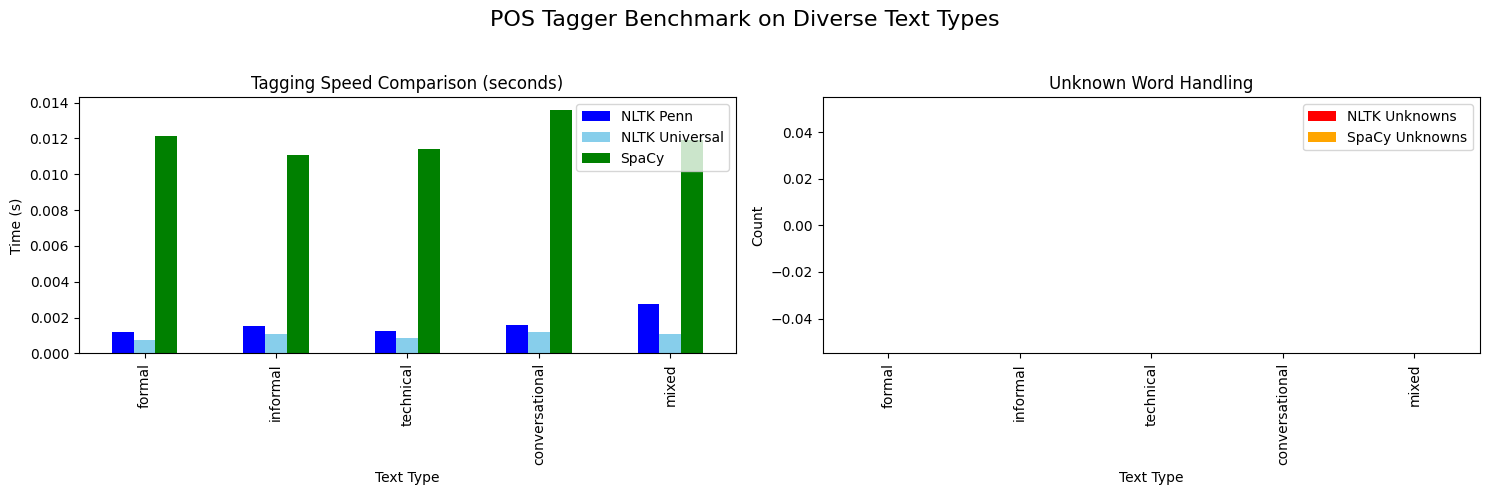

In [29]:
import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    tokens = nltk.word_tokenize(text)
    nltk_penn_tags = nltk.pos_tag(tokens)
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(tokens, tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    nltk_unknown = sum(1 for word, tag in nltk_penn_tags if tag == 'NNP' and word.islower() and len(word) > 2)
    spacy_unknown = sum(1 for token in spacy_doc if token.pos_ == 'X')

    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization
df = pd.DataFrame(benchmark_results).T.reset_index().rename(columns={'index': 'Text Type'})

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Speed comparison
df[['Text Type', 'nltk_penn_time', 'nltk_univ_time', 'spacy_time']].set_index('Text Type').plot.bar(
    ax=axes[0], color=['blue', 'skyblue', 'green'], title='Tagging Speed Comparison (seconds)'
)
axes[0].set_ylabel("Time (s)")
axes[0].legend(["NLTK Penn", "NLTK Universal", "SpaCy"])

# Unknowns comparison
df[['Text Type', 'nltk_unknown', 'spacy_unknown']].set_index('Text Type').plot.bar(
    ax=axes[1], color=['red', 'orange'], title='Unknown Word Handling'
)
axes[1].set_ylabel("Count")
axes[1].legend(["NLTK Unknowns", "SpaCy Unknowns"])

plt.suptitle("POS Tagger Benchmark on Diverse Text Types", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case? SpaCy is the fastest tagger among the three tested. It processes text more efficiently than NLTK's Penn Treebank and Universal taggers. Speed matters depending on the use case. For example, in a real-time chatbot or live customer support system, fast tagging is essential to keep response times low. In contrast, for offline analysis or smaller datasets, speed may be less important than tagging accuracy.

2. Which handles informal text best? SpaCy handles informal text better than NLTK. It recognizes emojis, internet slang, contractions, and disfluencies more accurately. While NLTK often tags unknown or informal words incorrectly as proper nouns or regular nouns, SpaCy uses a specific fallback tag ('X') to indicate unrecognized or unusual tokens, which is more transparent and useful for further processing.

3. How do the taggers compare on technical jargon? SpaCy performs slightly better on technical jargon. It tends to correctly tag terms like "API", "JSON", and "authentication" in context. NLTK can also handle technical words reasonably well, especially when the terms are common in general English. However, both taggers may struggle with highly domain-specific vocabulary unless they are fine-tuned or supported by a custom dictionary.

4. What trade-offs do you see between speed and accuracy? The main trade-off between speed and accuracy lies in the depth of analysis. SpaCy offers a good balance of speed and accuracy, making it ideal for most general-purpose applications. NLTK can be more interpretable or customizable but tends to be slower and less accurate with informal or noisy text. In fast-paced environments like customer support automation or social media monitoring, SpaCy’s speed and robustness provide a clear advantage. For research or educational purposes, where deeper linguistic structure is important, NLTK may still be useful despite its slower performance.



## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [32]:

# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tags = nltk_tags = nltk.pos_tag(tokens)
        spacy_doc = spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        repeated_tags = [tag for word, tag in nltk_tags if nltk_tags.count((word, tag)) > 1]
        unknown_spacy = [token.text for token in spacy_doc if token.pos_ == "X"]

        if repeated_tags:
            print("⚠️ Repeated tags (NLTK):", set(repeated_tags))
        if unknown_spacy:
            print("❓ Unknown or ambiguous tokens (SpaCy):", unknown_spacy)

    except Exception as e:
        print(f"❌ Error processing: {e}")

# Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
print("""\
POS taggers like NLTK and SpaCy perform well on everyday language but struggle with syntactically ambiguous or deliberately complex sentences.
In sentences such as "Buffalo buffalo Buffalo buffalo..." or "Can can can can...", the repeated words serve multiple roles (noun, verb, proper noun),
making it difficult for statistical taggers to determine their function without deeper syntactic or semantic understanding.

Taggers also fail with garden path sentences like "The man the boat the river." where parsing requires full sentence context to disambiguate roles.
In "James while John had had...", taggers cannot easily follow the layered use of verbs due to the unnatural structure.

Social media content and modern technical jargon present other challenges. SpaCy may mark hashtags, emojis, or unknown terms as 'X',
while NLTK may mislabel them as proper nouns or nouns arbitrarily. Domain-specific abbreviations like "IoT", "RESTful", or "AI/ML"
are often tagged inconsistently unless the model was trained on similar text.

Ultimately, part-of-speech taggers operate with limited context. They perform best on grammatically clean and complete sentences,
but they are not equipped to resolve deep ambiguity, idiomatic expressions, or multi-domain jargon without fine-tuning or combining with
syntactic parsers or transformer-based models like BERT.""")

🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('OMG', 'IN'), ('the', 'DT'), ('algorithm', 'NN'), ("'s", 'POS'), ('performance', 'NN'), ('is', 'VBZ'), ('absolutely', 'RB'), ('terrible', 'JJ'), ('!', '.'), ('The', 'DT'), ('accuracy', 'NN'), ('dropped', 'VBD'), ('to', 'TO'), ('23', 'CD'), ('%', 'NN'), ('wtf', 'NN')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('OMG', 'IN'), ('the', 'DT'), ('algorithm', 'NN'), ("'s", 'POS'), ('performance', 'NN'), ('is', 'VBZ'), ('absolutely', 'RB'), ('terrible', 'JJ'), ('!', '.'), ('The', 'DT'), ('accuracy', 'NN'), ('dropped', 'VBD'), ('to', 'TO'), ('23', 'CD'), ('%', 'NN'), ('wt


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers? These edge cases break traditional POS taggers because they rely heavily on surface-level patterns and local context. Rule-based and statistical taggers like NLTK and SpaCy use predefined grammars or probabilistic models trained on relatively standard corpora. When sentences involve repeated words serving different grammatical roles (such as in "Buffalo buffalo Buffalo buffalo..."), or contain intentionally ambiguous or non-standard structures (like garden path or recursive constructions), the taggers cannot disambiguate the syntax correctly. They also do not possess deep semantic understanding or long-range contextual awareness, which is necessary for resolving such complexity.

2. How might you preprocess text to handle some of these issues? Preprocessing can help reduce confusion for POS taggers in several ways. For example, punctuation normalization and sentence segmentation can clarify boundaries in complex sentences. Token replacement strategies could substitute emojis, URLs, or hashtags with placeholder tokens (like <emoji> or <url>) to simplify tagging. For ambiguous or technical content, domain-specific dictionaries or custom tokenizers can improve recognition. In some cases, breaking complex sentences into simpler clauses before tagging can help taggers handle each unit more accurately. However, these strategies have limits and may not fully resolve syntactic ambiguity.

3. When would these limitations matter in real applications? These limitations become critical in real-world applications where accuracy is essential. For example, in legal document processing, scientific paper analysis, or medical records, a misclassified noun or verb could lead to incorrect interpretations. In conversational AI or chatbots, misunderstanding social media language or sarcastic remarks could result in irrelevant or tone-deaf responses. In information extraction systems, errors in tagging affect downstream tasks like entity recognition, relationship detection, and sentiment analysis. In these contexts, relying solely on traditional POS tagging may compromise reliability.

4. How do modern large language models handle these cases differently? Modern large language models (LLMs) like BERT, GPT, and RoBERTa handle these cases more effectively because they use deep contextual embeddings and attention mechanisms. Instead of assigning tags based on local word pairs or fixed grammar rules, LLMs consider the entire sentence (or even surrounding paragraphs) to infer meaning and grammatical roles. This allows them to resolve ambiguity, identify idiomatic expressions, and understand uncommon word usage more robustly. While they are not perfect and can still struggle with extreme edge cases, they are significantly better at handling nuance, informal language, and syntactic complexity than traditional POS taggers.

---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?



### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**
I would choose SpaCy when I need fast, accurate, and robust POS tagging, especially for practical applications like real-time processing or handling informal and noisy text. SpaCy’s ease of use and modern design make it suitable for most industry projects. On the other hand, I might use NLTK when I want more control over linguistic details, work in an academic setting, or need to experiment with different tagsets or teaching purposes. NLTK is slower and sometimes less accurate on informal text but provides a strong foundation for learning the basics.

**2. Real-World Applications:**
POS tagging would be valuable in customer service analytics, where understanding the verbs, nouns, and emotional adjectives in call transcripts can help automatically categorize issues and detect urgent or frustrated customers. To implement this, I would preprocess transcripts with SpaCy to extract key POS tags, then build classifiers that use this linguistic information combined with sentiment scores to route tickets and prioritize responses effectively.

**3. Limitations and Solutions:**
The biggest limitation I discovered is that traditional POS taggers struggle with ambiguity, informal language, and complex sentence structures. To work around this, I would combine POS tagging with contextual embeddings from transformer-based models, or apply domain-specific preprocessing like normalization, token replacement, and fine-tuning taggers on the target text type. Also, integrating syntactic parsing can help resolve ambiguous cases more accurately.

**4. Future Learning:**
I want to explore neural POS tagging methods that leverage transformer architectures, such as BERT or GPT, especially focusing on fine-tuning these models for domain adaptation. Understanding how to train custom taggers on specialized corpora and improving performance on multilingual or noisy data are also areas I find compelling for future research.

**5. Integration:**
POS tagging is a foundational step in many NLP pipelines, supporting tasks such as syntactic parsing, named entity recognition, coreference resolution, and sentiment analysis. For example, knowing whether a word is a noun or verb helps disambiguate entities and extract relationships in information extraction systems. It also improves machine translation and question answering by clarifying grammatical structure, making POS tagging a crucial link in building more complex language understanding systems.



---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
